### <center> K-means </center>
                                                    

In [17]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
databis = arff.loadarff(open('diamond9.arff','r'))[0]
datatier = arff.loadarff(open('dense-disk-5000.arff','r'))[0]


#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))
    
def calinski_metric_kmeans(data2):
    scores=[]
    start = time.time()
    print('on applique kmeans avec calinski')


    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        calinski=metrics.calinski_harabasz_score(data2, labels)
        scores.append(calinski)
        plt.scatter(j, calinski )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    
    
def sil_kmeans(data2):
    print('on applique kmeans avec sil')
    scores=[]
    start = time.time()

    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        sil=metrics.silhouette_score(data2, labels, metric='euclidean')
        scores.append(sil)
        plt.scatter(j, sil )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    
def davies_kmeans(data2):
    
    print('on applique kmeans avec davies')

    scores=[]
    start = time.time()

    for j in range(2,30):
        cl = KMeans(n_clusters=j, init = 'k-means++').fit(data2)
        """plt.scatter(X, Y, c=cl)
        plt.title('k-means')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()"""
        labels = cl.labels_
        davies_b=davies_bouldin_score(data2, labels)
        scores.append(davies_b)
        plt.scatter(j, davies_b )

    print("The time used to execute this is given below")
    end = time.time()
    print(end - start)

    plt.title('metrique')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def kmeans(nbcluster, data2):
    start = time.time()
    clustering = KMeans(n_clusters=nbcluster, init = 'k-means++').fit(data2)
    plt.scatter(X, Y, c=clustering)
    end = time.time()
    print(end - start)
    plt.title('agglomerativeclustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### <center> Agglomerative Clustering method </center>
                                                    

In [30]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, datasets

data = arff.loadarff(open('3-spiral.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))

scores=[]

def calinski_metric_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec calinski'+i)

        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('k-means')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            calinski=metrics.calinski_harabasz_score(data2, cl)
            scores.append(calinski)
            plt.scatter(j, calinski )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

def sil_agglo(data2):
    scores=[]
    start = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec sil'+i)


        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('k-means')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            sil=metrics.silhouette_score(data2, cl, metric='euclidean')
            scores.append(sil)
            plt.scatter(j, sil )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    

def davies_agglo(data2):
    scores=[]
    start = time.time()

    for i in ['single', 'average', 'complete', 'ward']:
        print('on applique agglo avec davies'+i)

        for j in range(2,30):
            cl = AgglomerativeClustering(n_clusters=j, linkage=i, affinity='euclidean').fit_predict(data2)
            """plt.scatter(X, Y, c=cl)
            plt.title('k-means')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()"""
            davies_b=davies_bouldin_score(data2, cl)
            scores.append(davies_b)
            plt.scatter(j, davies_b )

        print("The time used to execute this is given below")
        end = time.time()
        print(end - start)

        plt.title('metrique')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    
def agglo(data2, nbcluster):
    for j in ['single', 'average', 'complete', 'ward']:
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering = AgglomerativeClustering(n_clusters=nbcluster, linkage=j, affinity='euclidean').fit_predict(data2)
        plt.scatter(X, Y, c=clustering)

        plt.title('agglomerativeclustering')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

        end = time.time()

        print(end - start)
        


### <center> DBSCAN </center>
                                                    

In [28]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN

data = arff.loadarff(open('3-spiral.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))

def davies_dbscan(data2):
    scores=[]    
    maxi=sys.maxint

    for jujube in range(2, 5):
        for iguane in np.arange(0.5, 2.0, 0.5):
            print('on applique dbscan avec davies, jujube :'+jujube+'iguane :'+iguane)
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=jujube,eps=iguane ).fit_predict(data2)
            davies_b=davies_bouldin_score(data2, clustering)
            end = time.time()
            print(end - start)
            if davies_b > maxi :
                best_tuple= (jujube, iguane)
                maxi=davies_b
                
    print(best_tuple)
    
def sil_dbscan(data2):
    scores=[]    
    maxi=sys.maxint
    
    for jujube in range(2, 5):
        for iguane in np.arange(0.5, 2.0, 0.5):
            print('on applique dbscan avec davies, jujube :'+jujube+'iguane :'+iguane)
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=jujube,eps=iguane ).fit_predict(data2)
            sil=metrics.silhouette_score(data2, clustering, metric='euclidean')
            end = time.time()
            print(end - start)
            if sil > maxi :
                best_tuple= (jujube, iguane)
                maxi=sil
                
    print(best_tuple)
    
def calinski_metric_dbscan(data2):
    scores=[]    
    maxi=sys.maxint
    
    for jujube in range(2, 5):
        for iguane in np.arange(0.5, 2.0, 0.5):
            print('on applique dbscan avec davies, jujube :'+jujube+'iguane :'+iguane)
            start=time.time()
        # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
            clustering = DBSCAN(min_samples=jujube,eps=iguane ).fit_predict(data2)
            calinski=metrics.calinski_harabasz_score(data2, clustering)
            end = time.time()
            print(end - start)
            if calinski > maxi :
                best_tuple= (jujube, iguane)
                maxi=calinski
                
    print(best_tuple)
    
def DBSCAN (data2, tuple):
    start=time.time()
    clustering = DBSCAN(min_samples=jujube,eps=iguane ).fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=clustering)

    plt.title('dbscanclustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


        

### <center> HDBSCAN </center>
                                                    

In [24]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn import metrics
import numpy as np
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.datasets import make_blobs

data = arff.loadarff(open('diamond9.arff','r'))[0]
#print(data)
""""for i in range(len(data)):
    x,y,z= data[i]
    plt.scatter(x, y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('ScatterPlot_01.png')"""
#plt.show()

#k means
data2= []
X=[]
Y=[]
for i in range(len(data)):
    x,y,z= data[i]
    X.append(x)
    Y.append(y)
    data2.append((x,y))


def davies_hdbscan(data2):
    scores=[] 
    maxi=sys.maxint

    for jujube in range(2, 5):
        print('on applique dbscan avec davies, jujube :'+jujube)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=jujube)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        davies_b=davies_bouldin_score(data2, labels)
        end = time.time()
        print(end - start)
        if davies_b > maxi :
            best= jujube
            maxi=davies_b
                
    print(best) 
    
def sil_hdbscan(data2):
    scores=[] 
    maxi=sys.maxint

    for jujube in range(2, 5):
        print('on applique dbscan avec davies, jujube :'+jujube)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=jujube)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        sil=metrics.silhouette_score(data2, cluster_labels, metric='euclidean')
        end = time.time()
        print(end - start)
        if sil > maxi :
            best= jujube
            maxi=sil
                
    print(best) 
    
    
def calinski_metric_hdbscan(data2):
    scores=[] 
    maxi=sys.maxint

    for jujube in range(2, 5):
        print('on applique dbscan avec davies, jujube :'+jujube)
        start=time.time()
    # agglomerative clustering fonctionne avec deux paramètres pour calculer la distance entre les clusters, linkage pour définir quels points on prend dans le cluster et affinity pour indiquer quel metrique on utilise
        clustering2 = hdbscan.HDBSCAN(min_samples=jujube)
        cluster_labels = clustering2.fit_predict(data2)
        labels = cluster_labels
        calinski=metrics.calinski_harabasz_score(data2, cluster_labels)
        end = time.time()
        print(end - start)
        if calinski > maxi :
            best= jujube
            maxi=calinski

    print(best) 
    
    
def HDBSCAN (data2, jujube):
    start=time.time()
    clustering2 = hdbscan.HDBSCAN(min_samples=jujube)
    cluster_labels = clustering2.fit_predict(data2)
    end = time.time()
    
    plt.scatter(X, Y, c=clustering2)

    plt.title('hdbscanclustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()



        





### <center> Synthèse </center>
                                                    

on applique kmeans avec sil
The time used to execute this is given below
1.656808614730835


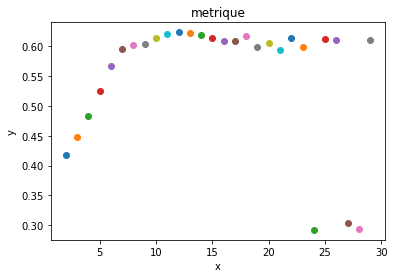

on applique kmeans avec calinski
The time used to execute this is given below
1.5110461711883545


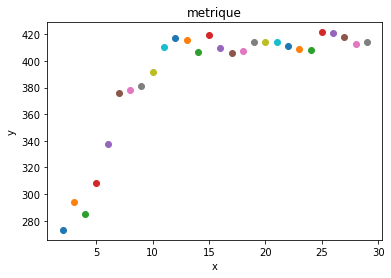

on applique kmeans avec davies
The time used to execute this is given below
1.5774729251861572


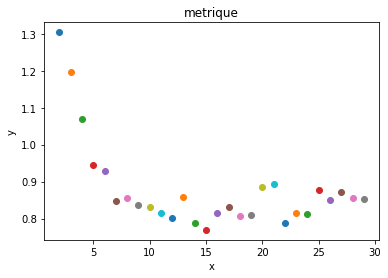

on applique agglo avec silsingle
The time used to execute this is given below
0.3310079574584961


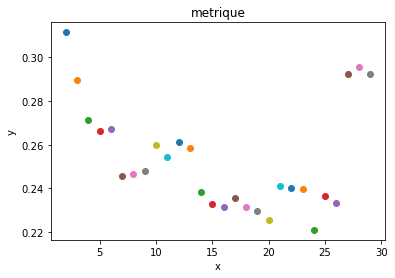

on applique agglo avec silaverage
The time used to execute this is given below
0.9089818000793457


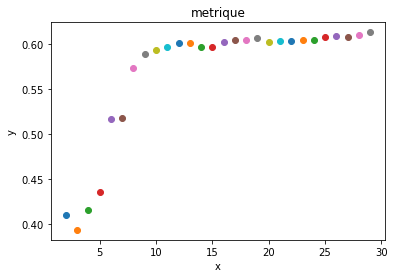

on applique agglo avec silcomplete
The time used to execute this is given below
1.511359453201294


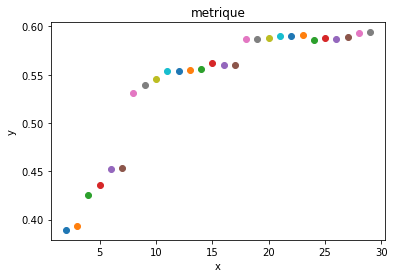

on applique agglo avec silward
The time used to execute this is given below
2.145444631576538


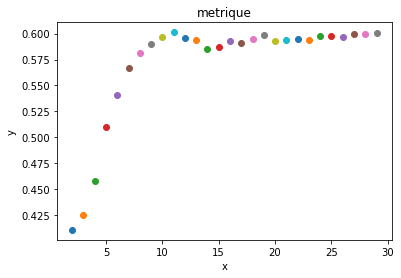

on applique agglo avec calinskisingle
The time used to execute this is given below
0.16377878189086914


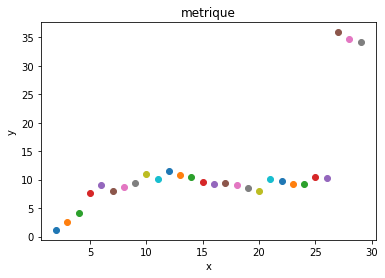

on applique agglo avec calinskiaverage
The time used to execute this is given below
0.5738968849182129


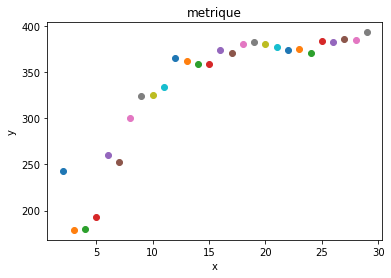

on applique agglo avec calinskicomplete
The time used to execute this is given below
1.0231003761291504


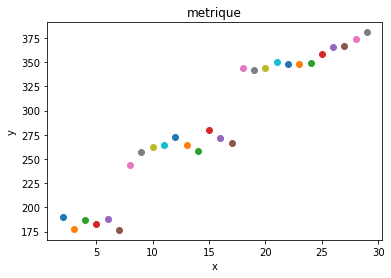

on applique agglo avec calinskiward
The time used to execute this is given below
1.4639487266540527


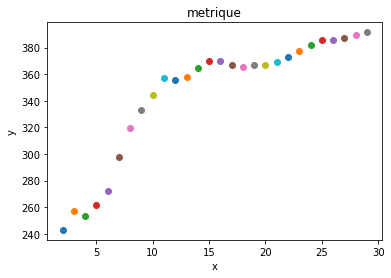

on applique agglo avec daviessingle
The time used to execute this is given below
0.22490191459655762


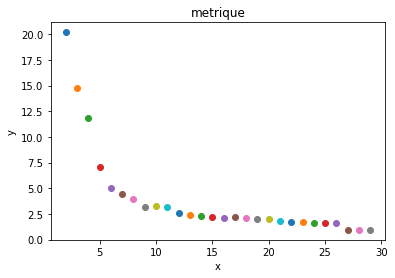

on applique agglo avec daviesaverage
The time used to execute this is given below
0.7014760971069336


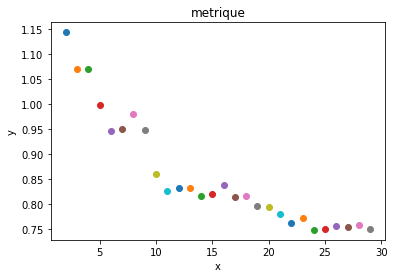

on applique agglo avec daviescomplete
The time used to execute this is given below
1.185915231704712


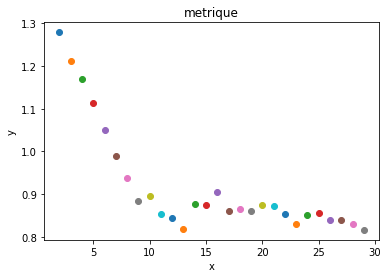

on applique agglo avec daviesward
The time used to execute this is given below
1.6799273490905762


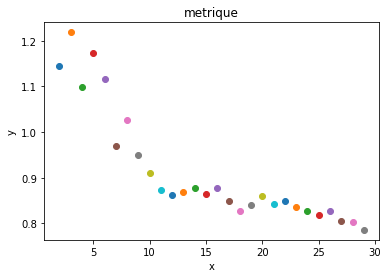

on applique kmeans avec sil
The time used to execute this is given below
1.8609182834625244


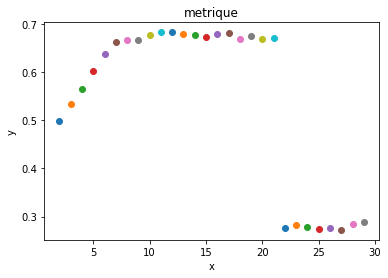

on applique kmeans avec calinski
The time used to execute this is given below
1.531994104385376


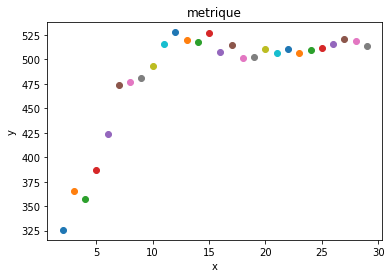

on applique kmeans avec davies
The time used to execute this is given below
1.6372089385986328


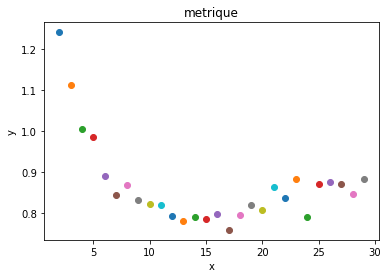

on applique agglo avec silsingle
The time used to execute this is given below
0.48558616638183594


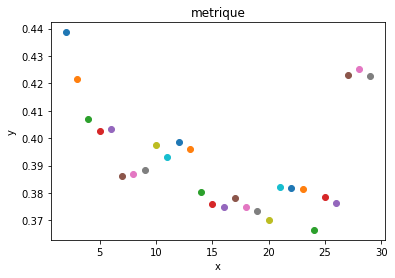

on applique agglo avec silaverage
The time used to execute this is given below
1.2503838539123535


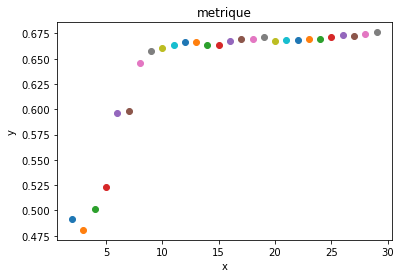

on applique agglo avec silcomplete
The time used to execute this is given below
2.0294690132141113


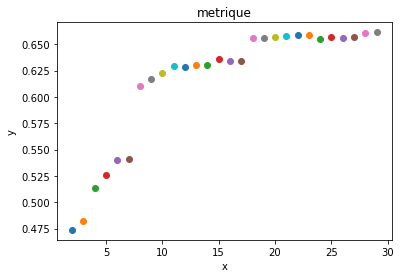

on applique agglo avec silward
The time used to execute this is given below
2.8402061462402344


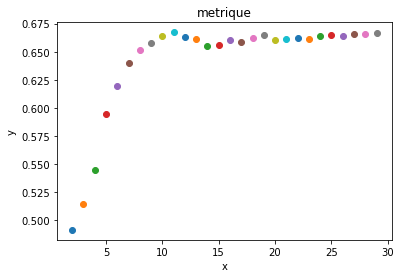

on applique agglo avec calinskisingle
The time used to execute this is given below
0.22809386253356934


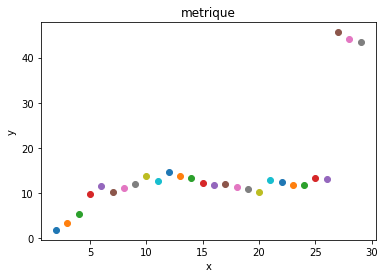

on applique agglo avec calinskiaverage
The time used to execute this is given below
0.7515428066253662


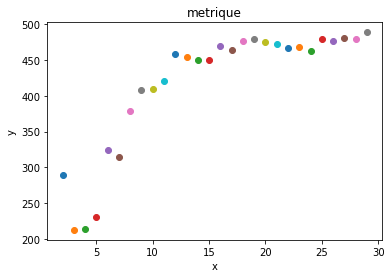

on applique agglo avec calinskicomplete
The time used to execute this is given below
1.2812626361846924


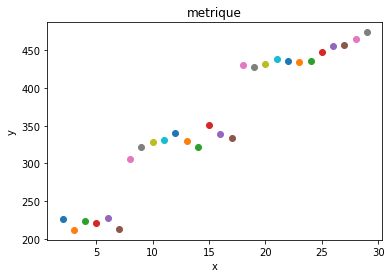

on applique agglo avec calinskiward
The time used to execute this is given below
1.8376057147979736


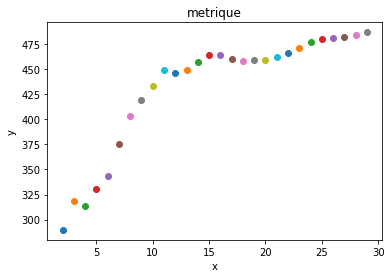

on applique agglo avec daviessingle
The time used to execute this is given below
0.2692446708679199


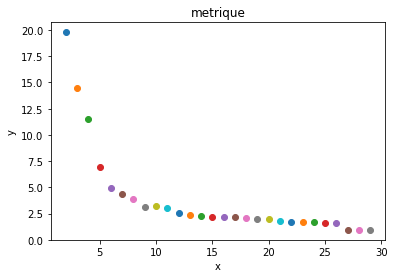

on applique agglo avec daviesaverage
The time used to execute this is given below
0.8355376720428467


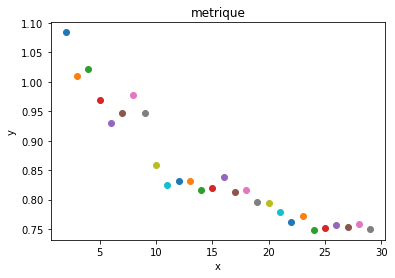

on applique agglo avec daviescomplete
The time used to execute this is given below
1.4110591411590576


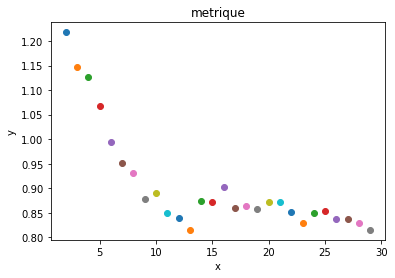

on applique agglo avec daviesward
The time used to execute this is given below
2.0221457481384277


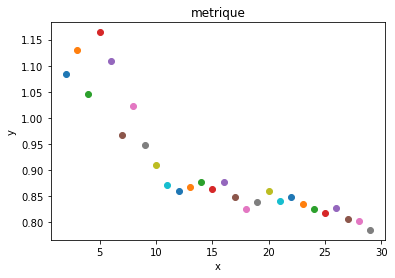

on applique kmeans avec sil
The time used to execute this is given below
2.1517884731292725


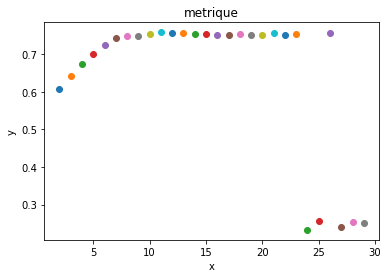

on applique kmeans avec calinski
The time used to execute this is given below
1.7041144371032715


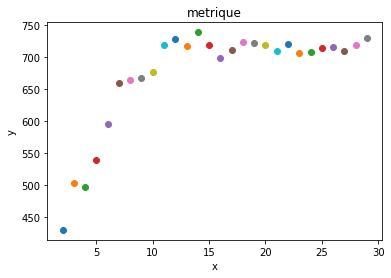

on applique kmeans avec davies
The time used to execute this is given below
1.7356529235839844


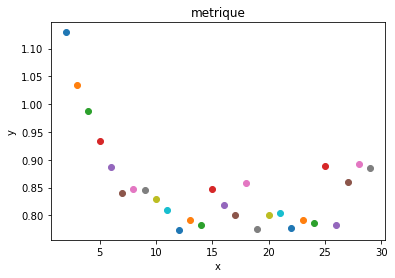

on applique agglo avec silsingle
The time used to execute this is given below
0.7949793338775635


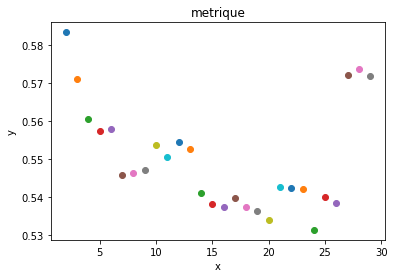

on applique agglo avec silaverage
The time used to execute this is given below
1.9986553192138672


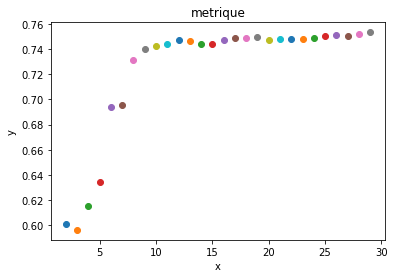

on applique agglo avec silcomplete
The time used to execute this is given below
3.2235360145568848


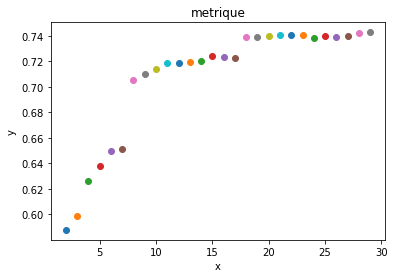

on applique agglo avec silward
The time used to execute this is given below
4.50577712059021


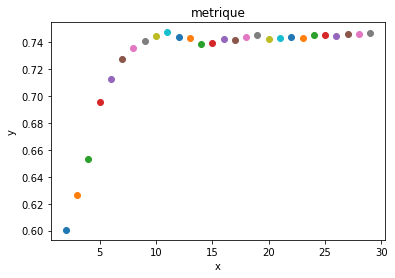

on applique agglo avec calinskisingle
The time used to execute this is given below
0.30736446380615234


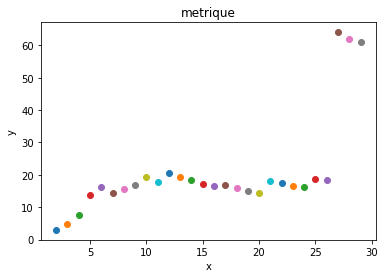

on applique agglo avec calinskiaverage
The time used to execute this is given below
1.0230355262756348


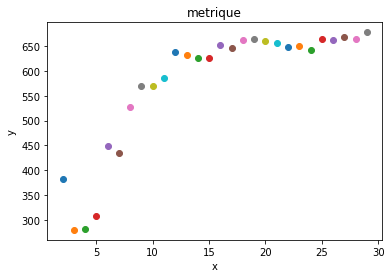

on applique agglo avec calinskicomplete
The time used to execute this is given below
1.774827480316162


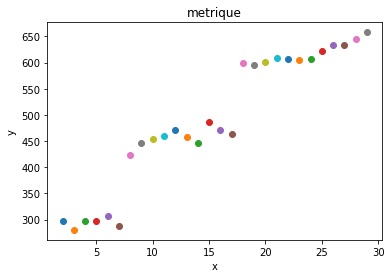

on applique agglo avec calinskiward
The time used to execute this is given below
2.599435329437256


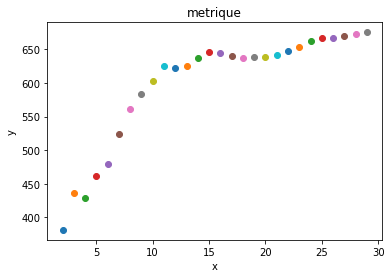

on applique agglo avec daviessingle
The time used to execute this is given below
0.38524365425109863


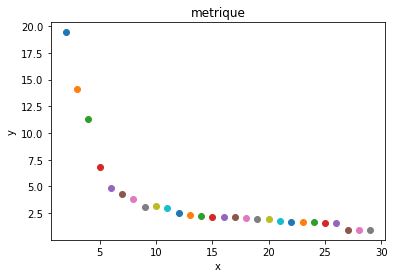

on applique agglo avec daviesaverage
The time used to execute this is given below
1.2548584938049316


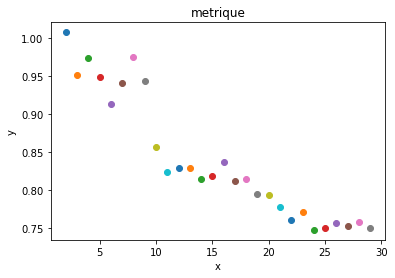

on applique agglo avec daviescomplete
The time used to execute this is given below
2.0722086429595947


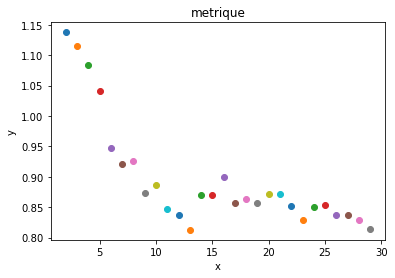

on applique agglo avec daviesward
The time used to execute this is given below
2.9745371341705322


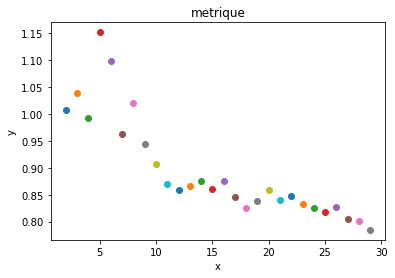

ValueError: not enough values to unpack (expected 3, got 2)

In [31]:
from scipy.io import arff
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy
from sklearn.metrics import davies_bouldin_score
import time
from sklearn import manifold, datasets

data = numpy.loadtxt('../real-world/a.data')
data2 = numpy.loadtxt('../real-world/h.data')
data3 = numpy.loadtxt('../real-world/t.data')
data4 = numpy.loadtxt('../real-world/tr.data')
data5 = numpy.loadtxt('../real-world/zgn.data')
data6 = numpy.loadtxt('../real-world/zgo.data')

data_ready= []
X=[]
Y=[]
Z=[]

for j in [data, data2, data3, data4, data5, data6] : 

    for i in range(len(j)):
        x,y,z= j[i]
        X.append(x)
        Y.append(y)
        Z.append(z)
        data_ready.append((x,y,z))
        
    sil_kmeans(data_ready)
    calinski_metric_kmeans(data_ready)
    davies_kmeans(data_ready)
    #kmeans(nbcluster=, data_ready)
    
    sil_agglo(data_ready)
    calinski_metric_agglo(data_ready)
    davies_agglo(data_ready)
    #agglo(data2, nbcluster=)
    
    

